## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getY(x):
    return 3.59 * x + 5.8 + np.random.randint(-5, 5)

In [3]:
x = np.random.random((100, 1))

In [4]:
y = [getY(x_) for x_ in x]

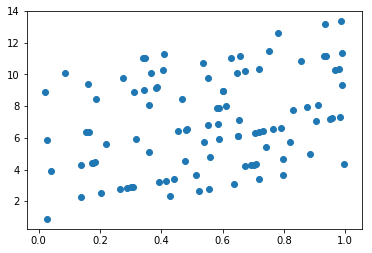

In [5]:
plt.scatter(x, y)

In [6]:
def general_function(x, y):
    lr = LinearRegression().fit(x, y)
    return lr.coef_, lr.intercept_

In [7]:
k, b = general_function(x, y)

In [8]:
def n_getY(x):
    return k * x + b

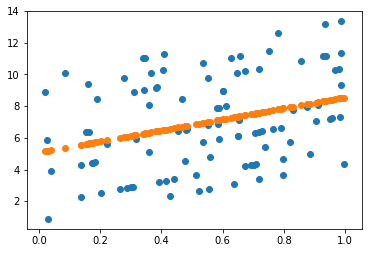

In [9]:
n_y = [n_getY(x_) for x_ in x]
plt.scatter(x, y)
plt.scatter(x, n_y)

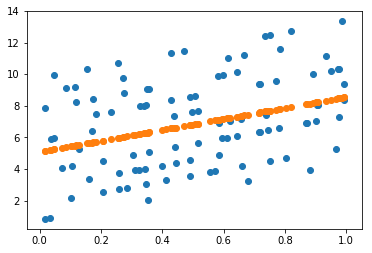

In [10]:
n_x = np.random.random((100, 1))
n_x_y = [getY(x_) for x_ in n_x]
n_x_n_y = [n_getY(x_) for x_ in n_x]
plt.scatter(n_x, n_x_y)
plt.scatter(n_x, n_x_n_y)

In [11]:
n_getY(0.5)

array([[6.82054564]])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [12]:
from scipy.spatial.distance import cosine
from collections import Counter

In [13]:
def distance(x, y):
    #return cosine(x, y)
    return np.sqrt((x - y) ** 2)

In [14]:
def predict(X, Y, x, k = 5):
    most_similiar = sorted([(x_, y_) for x_, y_ in zip(list(X), list(Y))], key = lambda m: distance(m[0], x))[:k]
    print(most_similiar)
    counter = Counter(most_similiar)
    return counter.most_common(1)

In [15]:
m = x[:,0]
n = [getY(x_) for x_ in m]

In [16]:
m

array([0.36142608, 0.64579253, 0.4405999 , 0.63752395, 0.82002331,
       0.40506263, 0.58905643, 0.22114902, 0.3865991 , 0.36523116,
       0.41618609, 0.61039439, 0.60221159, 0.87615498, 0.20299747,
       0.53773728, 0.71915358, 0.16395665, 0.78213231, 0.31664934,
       0.55239152, 0.58964147, 0.15965062, 0.85701874, 0.26482103,
       0.71778649, 0.99509357, 0.46911506, 0.55983182, 0.47776632,
       0.9835649 , 0.98701567, 0.67433125, 0.98828602, 0.48126192,
       0.58551648, 0.8856217 , 0.79736746, 0.45570606, 0.13741463,
       0.76317381, 0.71743302, 0.70872448, 0.70630107, 0.48287304,
       0.18361752, 0.55512733, 0.7503216 , 0.9295249 , 0.33926328,
       0.93814647, 0.348316  , 0.79028785, 0.52218342, 0.83013186,
       0.69184607, 0.90479939, 0.15402388, 0.73993188, 0.73020377,
       0.343736  , 0.28927721, 0.6574726 , 0.39406192, 0.97977298,
       0.62823191, 0.95078848, 0.64939532, 0.03923566, 0.02069697,
       0.51380056, 0.35949034, 0.08571486, 0.40977103, 0.67440

In [17]:
predict(m, n, 0.5)

[(0.5138005624267659, 3.6445440191120895), (0.48287304267436026, 9.533514223200953), (0.4812619185160849, 3.5277302874727443), (0.5221834185915744, 11.674638472743752), (0.4777663204862648, 6.51518109054569)]


[((0.5138005624267659, 3.6445440191120895), 1)]

In [18]:
#关于cosine方法的疑惑
#传入单个数值，结果应为0才是，为什么会出现其他值？
from scipy.spatial.distance import cosine
cosine(0.7823827405831938, 5)

-2.220446049250313e-16

In [19]:
#翻看GitHub源码
import numpy as np
from scipy.linalg import norm

def _validate_vector(u, dtype=None):
    # XXX Is order='c' really necessary?
    u = np.asarray(u, dtype=dtype, order='c').squeeze()
    # Ensure values such as u=1 and u=[1] still return 1-D arrays.
    u = np.atleast_1d(u)
    if u.ndim > 1:
        raise ValueError("Input vector should be 1-D.")
    return u

In [20]:
#0.17.1版本
def cosine_0(u, v):
    u = _validate_vector(u)
    v = _validate_vector(v)
    dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))
    return dist

cosine_0(0.7823827405831938, 5)

0.0

In [21]:
#1.1版本
def cosine_1(u, v, w=None):
    # cosine distance is also referred to as 'uncentered correlation',
    #   or 'reflective correlation'
    return correlation(u, v, w=w, centered=False)

def correlation(u, v, w=None, centered=True):
    u = _validate_vector(u)
    v = _validate_vector(v)
    if w is not None:
        w = _validate_weights(w)
    if centered:
        umu = np.average(u, weights=w)
        vmu = np.average(v, weights=w)
        u = u - umu
        v = v - vmu
    uv = np.average(u * v, weights=w)
    uu = np.average(np.square(u), weights=w)
    vv = np.average(np.square(v), weights=w)
    dist = 1.0 - uv / np.sqrt(uu * vv)
    return dist

cosine_1(0.7823827405831938, 5)

-2.220446049250313e-16

In [22]:
#计算时的误差，计算机存储小数方式，开方数值发生误差
test_num_1 = 0.7823827405831938
test_num_2 = 5

is_same = test_num_1 * test_num_2 == np.sqrt((test_num_1 ** 2) * (test_num_2 ** 2))
res_1 = test_num_1 * test_num_2 / np.sqrt((test_num_1 ** 2) * (test_num_2 ** 2))
res_2 = 1.0 - res_1
print(is_same)
print(res_1)
print(res_2)

False
1.0000000000000002
-2.220446049250313e-16


In [23]:
#关于距离的度量
#1、欧氏距离
#2、曼哈顿距离
#3、闵可夫斯基距离
#4、切比雪夫距离
#5、余弦距离

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选择(6')

In [24]:
import pandas as pd

In [25]:
def entropy(elements):
    count = Counter(elements)
    ps = [count[p] / len(elements) for p in elements]
    return -sum(p * np.log(p) for p in ps)

In [26]:
def find_min_spliter(train_data, target):
    min_spliter = None
    min_v = float('inf')
    values = set(train_data.columns.tolist()) - {target}
    for v in values:
        results = set(train_data[v])
        for r in results:
            e1 = entropy(train_data[train_data[v] == r][target].tolist())
            e2 = entropy(train_data[train_data[v] != r][target].tolist())
            e = e1 + e2
            if e <= min_v:# why not just <
                min_v = e
                min_spliter = (v, r)
    return min_spliter

In [27]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [28]:
m_data = pd.DataFrame.from_dict(mock_data)

In [29]:
m_data

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [30]:
find_min_spliter(m_data, 'bought')

('family_number', 2)

In [31]:
m_data[m_data['family_number'] != 2]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [32]:
sub_df = m_data[m_data['family_number'] != 2]

In [33]:
sub_df[sub_df['gender'] == 'M']

,gender,income,family_number,bought
4,M,+10,1,0
5,M,+10,1,0


In [34]:
find_min_spliter(sub_df[sub_df['gender'] != 'M'], 'bought')

('income', '-10')

In [35]:
def find_spliter(train_data, target):
    spliters = []
    while True:
        spliter = find_min_spliter(train_data, target)
        spliters.append(spliter)
        if len(set(train_data[train_data[spliter[0]] != spliter[1]][target])) > 1:
            train_data = train_data[train_data[spliter[0]] != spliter[1]]
        else:
            train_data = train_data[train_data[spliter[0]] == spliter[1]]
        li = train_data.columns.tolist()
        vs = [set(train_data[l]) for l in li]
        sum_v = sum(len(v) for v in vs)
        if sum_v <= len(li) + 1:
            break
    return spliters

In [36]:
find_spliter(m_data, 'bought')

[('family_number', 2), ('gender', 'M'), ('income', '-10')]

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [37]:
from sklearn.cluster import KMeans
from collections import defaultdict

In [38]:
def kmeans_train(x, y, n_clusters, max_iter):
    train_data = [[x_, y_] for x_, y_ in zip(list(x), list(y))]
    cluster = KMeans(n_clusters=n_clusters, max_iter=max_iter)
    cluster.fit(train_data)
    res_center = cluster.cluster_centers_
    res_dict = defaultdict(list)
    for label, d in zip(cluster.labels_, train_data):
        res_dict[label].append(d)
    return res_dict, res_center

In [39]:
km_x = [np.random.randint(0, 100) for _ in range(100)]
km_y = [np.random.randint(0, 100) for _ in range(100)]

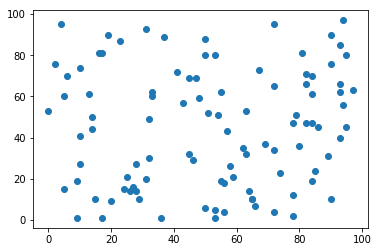

In [40]:
plt.scatter(km_x, km_y)

In [41]:
res_dict, res_center = kmeans_train(km_x, km_y, 5, 500)

In [42]:
res_center

array([[14.07142857, 75.71428571],
       [85.83333333, 65.79166667],
       [66.18518519, 18.55555556],
       [20.78947368, 17.63157895],
       [47.1875    , 62.875     ]])

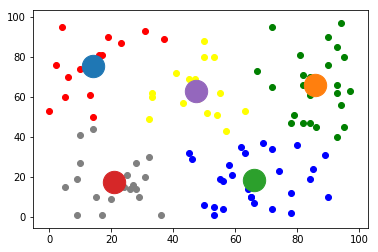

In [43]:
colors = ['red', 'blue', 'green', 'grey', 'yellow']
for i, k in enumerate(res_dict):
    for v in res_dict.get(k):
        plt.scatter(v[0], v[1], c=colors[i])
        
for i in res_center:
    plt.scatter(*i,s=500)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

模型就是要训练的概率分布或决策函数。对于不同的使用场景考虑的要点不同，对模型的要求也不尽相同。但是对于特定的场景，这样的模型却是合理有效的。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

模型训练太差，模型太过简单，无法充分表现属性与结果之间的关系，导致错误率很高，这种现象称为欠拟合。
过于追求对训练数据的预测能力，导致所选模型比实际模型复杂度更高，对已知数据预测很好，但对未知数据预测很差，这种现象称为过拟合。
欠拟合原因：训练数据规模不足。
过拟合原因：训练数据规模不足，模型过于复杂，一味追求对训练数据的预测能力。

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

precision = tp / (tp + fp) 准确率：针对预测样本而言，预测出来的结果中，有多少是被正确预测的。
recall = tp / (tp + fn) 查全率：针对实际样本而言，有多少样本被正确的预测出来了。
AUC：考虑样本预测的排序质量，与排序误差紧密联系。
F1 = 2 * (precision * recall) / (precision + recall) 基于准确率与查全率的调和平均定义，同时兼顾了准确率和查全率。
F2score = (1 + 2^2) * (precision * recall) / (2^2 * precision + recall) 查全率有更大影响。

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

机器学习致力于研究如何通过计算的手段，基于训练数据产生模型，当面对新的数据时，模型提供相应的预判。而传统的编程过程中，我们通过代码实现算法进行计算。机器学习通过数据学习自动生成算法，而传统的编程是通过人工实现算法进行数据处理。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

不同模型在不同场景下的表现各异，模型本身没有优劣之分，只有适不适合。评价标准反映了场景需求，针对评价标准便于选用更适合的模型。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [44]:
class decision_node:
    def __init__(self, col=-1, value=None, results=None, tb=None, fb=None):
        self.col = col
        self.value = value
        self.results = results
        self.tb = tb
        self.fb = fb

In [45]:
def entropy(elements):
    count = Counter(elements)
    ps = [count[p] / len(elements) for p in elements]
    return -sum(p * np.log(p) for p in ps)

In [46]:
def build_tree(train_data, target):
    if len(train_data) == 0:
        return decision_node()
    
    li = train_data.columns.tolist()
    vs = [set(train_data[l]) for l in li]
    sum_v = sum(len(v) for v in vs)
    if sum_v <= len(li) + 1 or len(set(train_data[target])) == 1:
        count = Counter(train_data[target].tolist())
        return decision_node(results=count)
    
    min_spliter = None
    min_v = float('inf')
    values = set(train_data.columns.tolist()) - {target}
    min_tb, min_fb = None, None
    for v in values:
        results = set(train_data[v])
        for r in results:
            tb, fb = None, None
            if type(r) == int or type(r) == float:
                tb = train_data[train_data[v] >= r]
                fb = train_data[train_data[v] < r]
            else:
                tb = train_data[train_data[v] == r]
                fb = train_data[train_data[v] != r]
            e1 = entropy(tb[target].tolist())
            e2 = entropy(fb[target].tolist())
            e = e1 + e2
            if e <= min_v:
                min_v = e
                min_spliter = (v, r)
                min_tb = tb
                min_fb = fb
                
    true_branch = build_tree(min_tb, target)
    false_branch = build_tree(min_fb, target)
    return decision_node(col=min_spliter[0], value=min_spliter[1], tb=true_branch, fb=false_branch)

In [47]:
def classify(observation, tree):
    if tree.results is not None:
        return tree.results
    else:
        v = observation[tree.col]
        if type(v) == int or type(v) == float:
            if v >= tree.value:
                return classify(observation, tree.tb)
            else:
                return classify(observation, tree.fb)
        else:
            if v == tree.value:
                return classify(observation, tree.tb)
            else:
                return classify(observation, tree.fb)

In [48]:
def print_tree(tree, indent=''):
    if tree.results is not None:
        print(str(tree.results))
    else:
        print(str(tree.col) + ':' + str(tree.value) + '?')
        
        print(indent + 'T->',)
        print_tree(tree.tb, indent + '  ')
        print(indent + 'F->',)
        print_tree(tree.fb, indent + '  ')

In [49]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
m_data = pd.DataFrame.from_dict(mock_data)
m_data

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [50]:
decision_tree = build_tree(m_data, 'bought')

In [51]:
print_tree(decision_tree)

family_number:2?
T->
Counter({1: 2})
F->
gender:M?
  T->
Counter({0: 2})
  F->
income:-10?
    T->
Counter({1: 1})
    F->
Counter({1: 1, 0: 1})


In [52]:
def predicate(gender, income, family_number):
    return classify({'gender': gender, 'income': income, 'family_number': family_number}, decision_tree).most_common(1)[0][0]

In [53]:
predicate('F', '-10', 2)

1

In [54]:
predicate('M', '-10', 1)

0

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [55]:
from sklearn.datasets import load_boston

In [56]:
boston_data = load_boston()

In [57]:
boston_X = boston_data.data
boston_y = boston_data.target

In [58]:
boston_y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

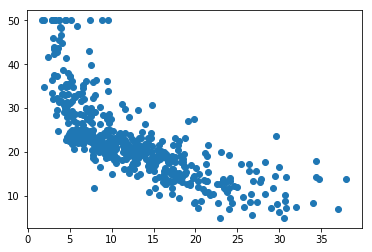

In [59]:
plt.scatter(boston_X[:,12], boston_y)

In [60]:
boston_x = boston_X[:,12]

In [61]:
def price(k, b, x):
    return k * x + b

In [62]:
def loss(y, y_):
    l_y = len(y)
    res_sum_y = 0
    for i in range(l_y):
        res_sum_y += abs(y[i] - y_[i])
    return res_sum_y / l_y

In [63]:
def partial_derivative_k_b(x, y, y_):
    l_x = len(x)
    res_sum_k = 0
    res_sum_b = 0
    for i in range(l_x):
        param = 1
        if y[i] > y_[i]:
            param = -1
        elif y[i] == y_[i]:
            param = 0
        res_sum_k += x[i] * param
        res_sum_b += param
    return res_sum_k / l_x, res_sum_b / l_x

In [64]:
def general_function_param(k, b, x, y, count, learn_rate):
    losses = []
    for i in range(count):
        y_ = [price(k, b, x_) for x_ in x]
        p_k, p_b = partial_derivative_k_b(x, y, y_)
        k += -1 * p_k * learn_rate
        b += -1 * p_b * learn_rate
        curr_loss = loss(y, y_)
        losses.append(curr_loss)
        print("The i is {}, the loss is {}, k is {} and b is {}".format(i, curr_loss, k, b))
    return k, b, losses

In [73]:
k, b, losses = general_function_param(np.random.random() * 200 - 100, np.random.random() * 200 - 100, boston_x, boston_y, 20000, 1e-3)

The i is 0, the loss is 421.5254546226378, k is 31.19648921527384 and b is 49.166009996001556
The i is 1, the loss is 421.3643546132547, k is 31.183836152032733 and b is 49.16500999600156
The i is 2, the loss is 421.2032546038712, k is 31.171183088791626 and b is 49.16400999600156
The i is 3, the loss is 421.0421545944877, k is 31.15853002555052 and b is 49.16300999600156
The i is 4, the loss is 420.8810545851042, k is 31.145876962309412 and b is 49.162009996001565
The i is 5, the loss is 420.7199545757206, k is 31.133223899068305 and b is 49.16100999600157
The i is 6, the loss is 420.55885456633723, k is 31.1205708358272 and b is 49.16000999600157
The i is 7, the loss is 420.3977545569539, k is 31.10791777258609 and b is 49.15900999600157
The i is 8, the loss is 420.23665454757077, k is 31.095264709344985 and b is 49.158009996001574
The i is 9, the loss is 420.0755545381872, k is 31.082611646103878 and b is 49.15700999600158
The i is 10, the loss is 419.9144545288032, k is 31.06995858

The i is 182, the loss is 392.2052529148508, k is 28.893631705392398 and b is 48.98400999600198
The i is 183, the loss is 392.04415290546757, k is 28.88097864215129 and b is 48.98300999600198
The i is 184, the loss is 391.8830528960839, k is 28.868325578910184 and b is 48.982009996001985
The i is 185, the loss is 391.7219528867006, k is 28.855672515669077 and b is 48.98100999600199
The i is 186, the loss is 391.5608528773175, k is 28.84301945242797 and b is 48.98000999600199
The i is 187, the loss is 391.3997528679337, k is 28.830366389186864 and b is 48.97900999600199
The i is 188, the loss is 391.23865285855015, k is 28.817713325945757 and b is 48.978009996001994
The i is 189, the loss is 391.0775528491668, k is 28.80506026270465 and b is 48.977009996001996
The i is 190, the loss is 390.91645283978346, k is 28.792407199463543 and b is 48.976009996002
The i is 191, the loss is 390.7553528303997, k is 28.779754136222437 and b is 48.975009996002
The i is 192, the loss is 390.59425282101

The i is 350, the loss is 365.14045133843194, k is 26.767917080886452 and b is 48.81600999600237
The i is 351, the loss is 364.97935132904877, k is 26.755264017645345 and b is 48.815009996002374
The i is 352, the loss is 364.81825131966497, k is 26.74261095440424 and b is 48.814009996002376
The i is 353, the loss is 364.6571513102818, k is 26.72995789116313 and b is 48.81300999600238
The i is 354, the loss is 364.49605130089833, k is 26.717304827922025 and b is 48.81200999600238
The i is 355, the loss is 364.33495129151487, k is 26.704651764680918 and b is 48.81100999600238
The i is 356, the loss is 364.1738512821321, k is 26.69199870143981 and b is 48.810009996002385
The i is 357, the loss is 364.0127512727482, k is 26.679345638198704 and b is 48.80900999600239
The i is 358, the loss is 363.85165126336466, k is 26.666692574957597 and b is 48.80800999600239
The i is 359, the loss is 363.6905512539812, k is 26.65403951171649 and b is 48.80700999600239
The i is 360, the loss is 363.52945

The i is 686, the loss is 311.0108481855946, k is 22.51648783187456 and b is 48.480009996003155
The i is 687, the loss is 310.84974817621134, k is 22.503834768633453 and b is 48.47900999600316
The i is 688, the loss is 310.68864816682765, k is 22.491181705392346 and b is 48.47800999600316
The i is 689, the loss is 310.527548157444, k is 22.47852864215124 and b is 48.47700999600316
The i is 690, the loss is 310.3664481480609, k is 22.465875578910133 and b is 48.476009996003164
The i is 691, the loss is 310.2053481386771, k is 22.453222515669026 and b is 48.475009996003166
The i is 692, the loss is 310.04424812929386, k is 22.44056945242792 and b is 48.47400999600317
The i is 693, the loss is 309.88314811991074, k is 22.427916389186812 and b is 48.47300999600317
The i is 694, the loss is 309.72204811052717, k is 22.415263325945705 and b is 48.47200999600317
The i is 695, the loss is 309.56094810114377, k is 22.4026102627046 and b is 48.471009996003176
The i is 696, the loss is 309.399848

The i is 915, the loss is 274.1189460367856, k is 19.618936349661098 and b is 48.25100999600369
The i is 916, the loss is 273.95784602740235, k is 19.60628328641999 and b is 48.25000999600369
The i is 917, the loss is 273.796746018019, k is 19.593630223178884 and b is 48.24900999600369
The i is 918, the loss is 273.6356460086356, k is 19.580977159937778 and b is 48.248009996003695
The i is 919, the loss is 273.47454599925203, k is 19.56832409669667 and b is 48.2470099960037
The i is 920, the loss is 273.3134459898683, k is 19.555671033455564 and b is 48.2460099960037
The i is 921, the loss is 273.15234598048505, k is 19.543017970214457 and b is 48.2450099960037
The i is 922, the loss is 272.9912459711014, k is 19.53036490697335 and b is 48.244009996003705
The i is 923, the loss is 272.830145961718, k is 19.517711843732243 and b is 48.24300999600371
The i is 924, the loss is 272.6690459523347, k is 19.505058780491137 and b is 48.24200999600371
The i is 925, the loss is 272.5079459429512

The i is 1090, the loss is 245.92644439468296, k is 17.404650282467404 and b is 48.076009996004096
The i is 1091, the loss is 245.76534438529924, k is 17.391997219226297 and b is 48.0750099960041
The i is 1092, the loss is 245.60424437591607, k is 17.37934415598519 and b is 48.0740099960041
The i is 1093, the loss is 245.44314436653255, k is 17.366691092744084 and b is 48.0730099960041
The i is 1094, the loss is 245.2820443571492, k is 17.354038029502977 and b is 48.072009996004105
The i is 1095, the loss is 245.1209443477656, k is 17.34138496626187 and b is 48.07100999600411
The i is 1096, the loss is 244.959844338382, k is 17.328731903020763 and b is 48.07000999600411
The i is 1097, the loss is 244.7987443289992, k is 17.316078839779657 and b is 48.06900999600411
The i is 1098, the loss is 244.6376443196154, k is 17.30342577653855 and b is 48.068009996004115
The i is 1099, the loss is 244.476544310232, k is 17.290772713297443 and b is 48.06700999600412
The i is 1100, the loss is 244.

The i is 1414, the loss is 193.73004135444677, k is 13.305057792348794 and b is 47.75200999600485
The i is 1415, the loss is 193.56894134506305, k is 13.292404729107687 and b is 47.75100999600485
The i is 1416, the loss is 193.40784133567968, k is 13.27975166586658 and b is 47.750009996004856
The i is 1417, the loss is 193.2467413262965, k is 13.267098602625474 and b is 47.74900999600486
The i is 1418, the loss is 193.08564131691296, k is 13.254445539384367 and b is 47.74800999600486
The i is 1419, the loss is 192.92454130752944, k is 13.24179247614326 and b is 47.74700999600486
The i is 1420, the loss is 192.7634412981461, k is 13.229139412902153 and b is 47.746009996004865
The i is 1421, the loss is 192.60234128876263, k is 13.216486349661047 and b is 47.74500999600487
The i is 1422, the loss is 192.4412412793792, k is 13.20383328641994 and b is 47.74400999600487
The i is 1423, the loss is 192.28014126999545, k is 13.191180223178833 and b is 47.74300999600487
The i is 1424, the loss 

The i is 1588, the loss is 165.69863972172723, k is 11.103424788396207 and b is 47.57800999600526
The i is 1589, the loss is 165.5375397123439, k is 11.0907717251551 and b is 47.57700999600526
The i is 1590, the loss is 165.37643970296006, k is 11.078118661913994 and b is 47.57600999600526
The i is 1591, the loss is 165.2153396935769, k is 11.065465598672887 and b is 47.575009996005264
The i is 1592, the loss is 165.05423968419333, k is 11.05281253543178 and b is 47.574009996005266
The i is 1593, the loss is 164.89313967481007, k is 11.040159472190673 and b is 47.57300999600527
The i is 1594, the loss is 164.73203966542658, k is 11.027506408949566 and b is 47.57200999600527
The i is 1595, the loss is 164.57093965604312, k is 11.01485334570846 and b is 47.57100999600527
The i is 1596, the loss is 164.40983964665978, k is 11.002200282467353 and b is 47.570009996005275
The i is 1597, the loss is 164.248739637276, k is 10.989547219226246 and b is 47.56900999600528
The i is 1598, the loss i

The i is 1744, the loss is 140.56703825790981, k is 9.129546922783543 and b is 47.42200999600562
The i is 1745, the loss is 140.40593824852644, k is 9.116893859542436 and b is 47.42100999600562
The i is 1746, the loss is 140.2448382391429, k is 9.10424079630133 and b is 47.420009996005625
The i is 1747, the loss is 140.0837382297594, k is 9.091587733060223 and b is 47.41900999600563
The i is 1748, the loss is 139.92263822037617, k is 9.078934669819116 and b is 47.41800999600563
The i is 1749, the loss is 139.76153821099248, k is 9.06628160657801 and b is 47.41700999600563
The i is 1750, the loss is 139.600438201609, k is 9.053628543336902 and b is 47.416009996005634
The i is 1751, the loss is 139.43933819222565, k is 9.040975480095796 and b is 47.41500999600564
The i is 1752, the loss is 139.27823818284224, k is 9.028322416854689 and b is 47.41400999600564
The i is 1753, the loss is 139.11713817345893, k is 9.015669353613582 and b is 47.41300999600564
The i is 1754, the loss is 138.956

The i is 1913, the loss is 113.34113667210752, k is 6.9911792350364905 and b is 47.253009996006014
The i is 1914, the loss is 113.18003666272413, k is 6.978526171795384 and b is 47.25200999600602
The i is 1915, the loss is 113.01893665334073, k is 6.965873108554277 and b is 47.25100999600602
The i is 1916, the loss is 112.85783664395733, k is 6.95322004531317 and b is 47.25000999600602
The i is 1917, the loss is 112.69673663457382, k is 6.940566982072063 and b is 47.24900999600602
The i is 1918, the loss is 112.53563662519045, k is 6.927913918830956 and b is 47.248009996006026
The i is 1919, the loss is 112.37453661580702, k is 6.91526085558985 and b is 47.24700999600603
The i is 1920, the loss is 112.2134366064236, k is 6.902607792348743 and b is 47.24600999600603
The i is 1921, the loss is 112.05233659703998, k is 6.889954729107636 and b is 47.24500999600603
The i is 1922, the loss is 111.89123658765658, k is 6.877301665866529 and b is 47.244009996006035
The i is 1923, the loss is 11

The i is 2250, the loss is 59.05043350988663, k is 2.727096922783492 and b is 46.9160099960068
The i is 2251, the loss is 58.889333500503184, k is 2.714443859542385 and b is 46.9150099960068
The i is 2252, the loss is 58.72823349111973, k is 2.701790796301278 and b is 46.914009996006804
The i is 2253, the loss is 58.567133481736306, k is 2.6891377330601713 and b is 46.91300999600681
The i is 2254, the loss is 58.406033472352874, k is 2.6764846698190645 and b is 46.91200999600681
The i is 2255, the loss is 58.2449334629694, k is 2.6638316065779577 and b is 46.91100999600681
The i is 2256, the loss is 58.083833453585925, k is 2.651178543336851 and b is 46.91000999600681
The i is 2257, the loss is 57.92273344420251, k is 2.638525480095744 and b is 46.909009996006816
The i is 2258, the loss is 57.761633434819075, k is 2.6258724168546372 and b is 46.90800999600682
The i is 2259, the loss is 57.600533425435536, k is 2.6132193536135304 and b is 46.90700999600682
The i is 2260, the loss is 57.

The i is 2412, the loss is 33.04688768892317, k is 0.6810508358269606 and b is 46.75546849403074
The i is 2413, the loss is 32.889728818682634, k is 0.668550776538423 and b is 46.754515924860776
The i is 2414, the loss is 32.732569948442105, k is 0.6560507172498854 and b is 46.753563355690815
The i is 2415, the loss is 32.575411078201604, k is 0.6435506579613478 and b is 46.752610786520854
The i is 2416, the loss is 32.41825220796111, k is 0.6310505986728102 and b is 46.751658217350894
The i is 2417, the loss is 32.261161965062264, k is 0.6185707765384229 and b is 46.750709600750106
The i is 2418, the loss is 32.10451613110102, k is 0.6060909544040355 and b is 46.74976098414932
The i is 2419, the loss is 31.947870297139804, k is 0.5936111322696481 and b is 46.74881236754853
The i is 2420, the loss is 31.79122446317853, k is 0.5811313101352608 and b is 46.747863750947744
The i is 2421, the loss is 31.63457862921732, k is 0.5686514880008734 and b is 46.746915134346956
The i is 2422, the 

The i is 2655, the loss is 7.040154685878009, k is -1.6745991048845024 and b is 46.56217600391211
The i is 2656, the loss is 7.034057777549106, k is -1.677029006070273 and b is 46.56173726873424
The i is 2657, the loss is 7.028112562321016, k is -1.6793208835406288 and b is 46.561306438694714
The i is 2658, the loss is 7.0228856867400165, k is -1.6813928400623679 and b is 46.5608874663627
The i is 2659, the loss is 7.018417145097045, k is -1.683464796584107 and b is 46.56046849403069
The i is 2660, the loss is 7.0141058070696785, k is -1.6854543420386525 and b is 46.56005347426784
The i is 2661, the loss is 7.010006317946244, k is -1.6874120693113799 and b is 46.559642407074165
The i is 2662, the loss is 7.006004645634157, k is -1.6893697965841072 and b is 46.55923133988049
The i is 2663, the loss is 7.002002973322059, k is -1.6913275238568346 and b is 46.558820272686816
The i is 2664, the loss is 6.998001301009959, k is -1.693285251129562 and b is 46.55840920549314
The i is 2665, the 

The i is 2911, the loss is 6.8768158366627565, k is -1.7861380376908347 and b is 46.4807767944258
The i is 2912, the loss is 6.876731529515366, k is -1.7861019309714672 and b is 46.48048825687639
The i is 2913, the loss is 6.876646971902771, k is -1.7860658242520997 and b is 46.48019971932698
The i is 2914, the loss is 6.876562414290169, k is -1.7860297175327322 and b is 46.479911181777574
The i is 2915, the loss is 6.8764778566775595, k is -1.7859936108133647 and b is 46.479622644228165
The i is 2916, the loss is 6.876393299064957, k is -1.7859575040939972 and b is 46.479334106678756
The i is 2917, the loss is 6.876308741452362, k is -1.7859213973746297 and b is 46.47904556912935
The i is 2918, the loss is 6.876226481347491, k is -1.786028610813365 and b is 46.4787491264416
The i is 2919, the loss is 6.876142520118641, k is -1.7859925040939975 and b is 46.47846058889219
The i is 2920, the loss is 6.8760579625060405, k is -1.78595639737463 and b is 46.47817205134278
The i is 2921, the 

The i is 3287, the loss is 6.845277707474806, k is -1.7800395396671487 and b is 46.37204952169805
The i is 3288, the loss is 6.845191393650215, k is -1.7799189270189273 and b is 46.37176888928698
The i is 3289, the loss is 6.845113281457369, k is -1.7799999744497574 and b is 46.37147639916841
The i is 3290, the loss is 6.845026392435097, k is -1.7800226819596388 and b is 46.371187861619
The i is 3291, the loss is 6.8449475506519635, k is -1.7799020693114174 and b is 46.37090722920793
The i is 3292, the loss is 6.844864388711409, k is -1.7799247768212987 and b is 46.37061869165852
The i is 3293, the loss is 6.844780619162979, k is -1.77994748433118 and b is 46.37033015410911
The i is 3294, the loss is 6.844697780340373, k is -1.7798268716829586 and b is 46.37004952169804
The i is 3295, the loss is 6.844618615439281, k is -1.77984957919284 and b is 46.369760984148634
The i is 3296, the loss is 6.844534845890862, k is -1.7798722867027212 and b is 46.369472446599225
The i is 3297, the loss

The i is 3410, the loss is 6.8351555146495455, k is -1.7780180179280074 and b is 46.33682422525514
The i is 3411, the loss is 6.835072944389834, k is -1.7780407254378887 and b is 46.336535687705734
The i is 3412, the loss is 6.834989174841416, k is -1.77806343294777 and b is 46.336247150156325
The i is 3413, the loss is 6.8349057443379415, k is -1.7779428202995486 and b is 46.335966517745256
The i is 3414, the loss is 6.834827171117715, k is -1.77796552780943 and b is 46.33567798019585
The i is 3415, the loss is 6.834743401569287, k is -1.7779882353193113 and b is 46.33538944264644
The i is 3416, the loss is 6.83465963202087, k is -1.7780109428291926 and b is 46.33510090509703
The i is 3417, the loss is 6.834577739851068, k is -1.7778903301809712 and b is 46.33482027268596
The i is 3418, the loss is 6.834497628297178, k is -1.7779130376908525 and b is 46.33453173513655
The i is 3419, the loss is 6.834413858748754, k is -1.7779357452007338 and b is 46.33424319758714
The i is 3420, the l

The i is 3876, the loss is 6.796825235892011, k is -1.770554974449703 and b is 46.203389442645786
The i is 3877, the loss is 6.7967436677454955, k is -1.7705153894694656 and b is 46.20310485766555
The i is 3878, the loss is 6.796661112163862, k is -1.7704758044892284 and b is 46.202820272685315
The i is 3879, the loss is 6.796579037190659, k is -1.7704985119991097 and b is 46.202531735135906
The i is 3880, the loss is 6.796497342005753, k is -1.7704589270188724 and b is 46.20224715015567
The i is 3881, the loss is 6.796414786424113, k is -1.7704193420386352 and b is 46.201962565175435
The i is 3882, the loss is 6.796332838489304, k is -1.7704420495485165 and b is 46.20167402762603
The i is 3883, the loss is 6.796251016266017, k is -1.7704024645682792 and b is 46.20138944264579
The i is 3884, the loss is 6.796168460684378, k is -1.770362879588042 and b is 46.201104857665555
The i is 3885, the loss is 6.796086639787952, k is -1.7703855870979233 and b is 46.20081632011615
The i is 3886, t

The i is 4190, the loss is 6.771174296943315, k is -1.7648007847263587 and b is 46.11383213039294
The i is 4191, the loss is 6.771094641042442, k is -1.7648068519200346 and b is 46.11354754541271
The i is 4192, the loss is 6.771013615620616, k is -1.7648129191137105 and b is 46.11326296043247
The i is 4193, the loss is 6.770933335830432, k is -1.7647566938172679 and b is 46.1129823280214
The i is 4194, the loss is 6.770853067559412, k is -1.7647627610109438 and b is 46.11269774304117
The i is 4195, the loss is 6.7707720421375965, k is -1.7647688282046197 and b is 46.11241315806093
The i is 4196, the loss is 6.770692374717535, k is -1.764712602908177 and b is 46.11213252564986
The i is 4197, the loss is 6.770611494076381, k is -1.764718670101853 and b is 46.11184794066963
The i is 4198, the loss is 6.770530936244047, k is -1.7646624448054102 and b is 46.11156730825856
The i is 4199, the loss is 6.770450946015184, k is -1.7646685119990861 and b is 46.11128272327832
The i is 4200, the los

The i is 4408, the loss is 6.75381522615394, k is -1.7609073064654823 and b is 46.05244082604491
The i is 4409, the loss is 6.753736279677273, k is -1.7608934527105415 and b is 46.05216019363384
The i is 4410, the loss is 6.753657333200603, k is -1.7608795989556008 and b is 46.05187956122277
The i is 4411, the loss is 6.753578386723932, k is -1.76086574520066 and b is 46.0515989288117
The i is 4412, the loss is 6.7534994402472615, k is -1.7608518914457192 and b is 46.05131829640063
The i is 4413, the loss is 6.753420493770604, k is -1.7608380376907784 and b is 46.05103766398956
The i is 4414, the loss is 6.753341547293936, k is -1.7608241839358376 and b is 46.05075703157849
The i is 4415, the loss is 6.753262600817265, k is -1.7608103301808968 and b is 46.05047639916742
The i is 4416, the loss is 6.7531836543406, k is -1.760796476425956 and b is 46.05019576675635
The i is 4417, the loss is 6.75310470786393, k is -1.7607826226710153 and b is 46.049915134345284
The i is 4418, the loss is

The i is 4850, the loss is 6.719954936695519, k is -1.752137345991168 and b is 45.930436873475884
The i is 4851, the loss is 6.719880814559731, k is -1.7521309625919586 and b is 45.930164146203154
The i is 4852, the loss is 6.719806393646654, k is -1.752124579192749 and b is 45.929891418930424
The i is 4853, the loss is 6.719731972733575, k is -1.7521181957935397 and b is 45.929618691657694
The i is 4854, the loss is 6.719657551820505, k is -1.7521118123943302 and b is 45.929345964384964
The i is 4855, the loss is 6.719583130907429, k is -1.7521054289951208 and b is 45.929073237112235
The i is 4856, the loss is 6.719508709994356, k is -1.7520990455959113 and b is 45.928800509839505
The i is 4857, the loss is 6.719434423347785, k is -1.7520242432243698 and b is 45.92853173513595
The i is 4858, the loss is 6.719360509395995, k is -1.7520178598251603 and b is 45.92825900786322
The i is 4859, the loss is 6.719286088482925, k is -1.752011476425951 and b is 45.92798628059049
The i is 4860, t

The i is 5002, the loss is 6.708656081241276, k is -1.7497986898646904 and b is 45.88906137940441
The i is 5003, the loss is 6.7085816603282025, k is -1.749792306465481 and b is 45.88878865213168
The i is 5004, the loss is 6.708507698596104, k is -1.7497175040939394 and b is 45.88851987742812
The i is 5005, the loss is 6.708433459729849, k is -1.74971112069473 and b is 45.888247150155394
The i is 5006, the loss is 6.708359038816772, k is -1.7497047372955206 and b is 45.887974422882664
The i is 5007, the loss is 6.708284617903699, k is -1.7496983538963111 and b is 45.887701695609934
The i is 5008, the loss is 6.708210196990633, k is -1.7496919704971017 and b is 45.887428968337204
The i is 5009, the loss is 6.708135776077543, k is -1.7496855870978922 and b is 45.887156241064474
The i is 5010, the loss is 6.708061355164471, k is -1.7496792036986828 and b is 45.886883513791744
The i is 5011, the loss is 6.707987185248364, k is -1.7496044013271412 and b is 45.88661473908819
The i is 5012, t

The i is 5209, the loss is 6.6932693076919705, k is -1.7464931760307045 and b is 45.83272145845535
The i is 5210, the loss is 6.693195126927702, k is -1.746486792631495 and b is 45.83244873118262
The i is 5211, the loss is 6.69312070601463, k is -1.7464804092322856 and b is 45.83217600390989
The i is 5212, the loss is 6.693046285101551, k is -1.7464740258330762 and b is 45.83190327663716
The i is 5213, the loss is 6.692971864188479, k is -1.7464676424338668 and b is 45.831630549364434
The i is 5214, the loss is 6.692897443275396, k is -1.7464612590346573 and b is 45.831357822091704
The i is 5215, the loss is 6.692823022362328, k is -1.7464548756354479 and b is 45.831085094818974
The i is 5216, the loss is 6.6927487943442285, k is -1.7463800732639063 and b is 45.83081632011542
The i is 5217, the loss is 6.692674821763972, k is -1.7463736898646969 and b is 45.83054359284269
The i is 5218, the loss is 6.692600400850894, k is -1.7463673064654874 and b is 45.83027086556996
The i is 5219, th

The i is 5406, the loss is 6.678625299887636, k is -1.7434567531058094 and b is 45.779096952526075
The i is 5407, the loss is 6.67855143013557, k is -1.7433819507342678 and b is 45.77882817782252
The i is 5408, the loss is 6.678477099289287, k is -1.7433755673350584 and b is 45.77855545054979
The i is 5409, the loss is 6.678402678376212, k is -1.743369183935849 and b is 45.77828272327706
The i is 5410, the loss is 6.6783282574631375, k is -1.7433628005366395 and b is 45.77800999600433
The i is 5411, the loss is 6.678253836550065, k is -1.74335641713743 and b is 45.7777372687316
The i is 5412, the loss is 6.678179415636983, k is -1.7433500337382206 and b is 45.77746454145887
The i is 5413, the loss is 6.678104994723904, k is -1.7433436503390112 and b is 45.77719181418614
The i is 5414, the loss is 6.678030916787835, k is -1.7432688479674696 and b is 45.77692303948258
The i is 5415, the loss is 6.677956794125553, k is -1.7432624645682602 and b is 45.77665031220985
The i is 5416, the loss

The i is 5734, the loss is 6.654251431011204, k is -1.7379134329477197 and b is 45.68985584580603
The i is 5735, the loss is 6.654177010098125, k is -1.7379070495485103 and b is 45.6895831185333
The i is 5736, the loss is 6.6541025891850545, k is -1.7379006661493008 and b is 45.68931039126057
The i is 5737, the loss is 6.654028184506179, k is -1.7378319902599728 and b is 45.68904161655701
The i is 5738, the loss is 6.653954427694482, k is -1.7378256068607634 and b is 45.68876888928428
The i is 5739, the loss is 6.653880006781409, k is -1.737819223461554 and b is 45.68849616201155
The i is 5740, the loss is 6.653805585868332, k is -1.7378128400623445 and b is 45.68822343473882
The i is 5741, the loss is 6.653731164955256, k is -1.737806456663135 and b is 45.68795070746609
The i is 5742, the loss is 6.65365674404218, k is -1.7378000732639256 and b is 45.687677980193364
The i is 5743, the loss is 6.653582525399642, k is -1.7377313973745976 and b is 45.68740920548981
The i is 5744, the los

The i is 6405, the loss is 6.604394597600299, k is -1.7263419507343107 and b is 45.507318296397564
The i is 6406, the loss is 6.60432017668723, k is -1.7263355673351013 and b is 45.507045569124834
The i is 6407, the loss is 6.604245767521488, k is -1.7262668914457733 and b is 45.50677679442128
The i is 6408, the loss is 6.604172015196655, k is -1.7262605080465638 and b is 45.50650406714855
The i is 6409, the loss is 6.6040975942835765, k is -1.7262541246473544 and b is 45.50623133987582
The i is 6410, the loss is 6.604023173370495, k is -1.726247741248145 and b is 45.50595861260309
The i is 6411, the loss is 6.603948752457428, k is -1.7262413578489355 and b is 45.50568588533036
The i is 6412, the loss is 6.603874331544351, k is -1.726234974449726 and b is 45.50541315805763
The i is 6413, the loss is 6.603800108414951, k is -1.726166298560398 and b is 45.50514438335407
The i is 6414, the loss is 6.603726170053773, k is -1.7261599151611886 and b is 45.50487165608134
The i is 6415, the lo

The i is 6713, the loss is 6.581546764374498, k is -1.7213821483627787 and b is 45.423579165962266
The i is 6714, the loss is 6.581472342445932, k is -1.7213886108133716 and b is 45.423306438689536
The i is 6715, the loss is 6.581399070923992, k is -1.7213199349240436 and b is 45.42303766398598
The i is 6716, the loss is 6.581325062140045, k is -1.7213263973746364 and b is 45.42276493671325
The i is 6717, the loss is 6.581250640211487, k is -1.7213328598252293 and b is 45.42249220944052
The i is 6718, the loss is 6.581176397950274, k is -1.7212641839359013 and b is 45.422223434736964
The i is 6719, the loss is 6.581103359905599, k is -1.7212706463864942 and b is 45.421950707464234
The i is 6720, the loss is 6.581028937977032, k is -1.721277108837087 and b is 45.421677980191504
The i is 6721, the loss is 6.580954516048485, k is -1.72128357128768 and b is 45.421405252918774
The i is 6722, the loss is 6.580880866599205, k is -1.721214895398352 and b is 45.42113647821522
The i is 6723, the

The i is 6904, the loss is 6.5674150442346715, k is -1.7186341444102113 and b is 45.371697743037046
The i is 6905, the loss is 6.567340622306108, k is -1.7186406068608042 and b is 45.371425015764316
The i is 6906, the loss is 6.5672662003775475, k is -1.718647069311397 and b is 45.37115228849159
The i is 6907, the loss is 6.567193076864477, k is -1.718578393422069 and b is 45.37088351378803
The i is 6908, the loss is 6.567118920071655, k is -1.718584855872662 and b is 45.3706107865153
The i is 6909, the loss is 6.567044498143097, k is -1.7185913183232548 and b is 45.37033805924257
The i is 6910, the loss is 6.566970403890754, k is -1.7185226424339268 and b is 45.370069284539014
The i is 6911, the loss is 6.566897217837205, k is -1.7185291048845197 and b is 45.369796557266284
The i is 6912, the loss is 6.566822795908646, k is -1.7185355673351126 and b is 45.369523829993554
The i is 6913, the loss is 6.566748373980084, k is -1.7185420297857055 and b is 45.369251102720824
The i is 6914, t

The i is 7295, the loss is 6.539122994468255, k is -1.7110727017224676 and b is 45.26682027268108
The i is 7296, the loss is 6.539051307809182, k is -1.7110820890742462 and b is 45.266551497977524
The i is 7297, the loss is 6.538979383900205, k is -1.7110291839359062 and b is 45.26628667584313
The i is 7298, the loss is 6.538908298994014, k is -1.7110385712876848 and b is 45.26601790113958
The i is 7299, the loss is 6.5388359710303625, k is -1.7110479586394634 and b is 45.26574912643602
The i is 7300, the loss is 6.538765092480642, k is -1.7109950535011234 and b is 45.26548430430163
The i is 7301, the loss is 6.538692962215197, k is -1.711004440852902 and b is 45.26521552959807
The i is 7302, the loss is 6.5386214819126, k is -1.710951535714562 and b is 45.26495070746368
The i is 7303, the loss is 6.538549953400032, k is -1.7109609230663405 and b is 45.264681932760126
The i is 7304, the loss is 6.538477871344555, k is -1.7109080179280005 and b is 45.264417110625736
The i is 7305, the l

The i is 7403, the loss is 6.531386335744679, k is -1.7092833736592181 and b is 45.23797047030945
The i is 7404, the loss is 6.531315333862294, k is -1.7092304685208781 and b is 45.23770564817506
The i is 7405, the loss is 6.531243326929517, k is -1.7092398558726567 and b is 45.2374368734715
The i is 7406, the loss is 6.5311717232942526, k is -1.7091869507343167 and b is 45.23717205133711
The i is 7407, the loss is 6.531100318114346, k is -1.7091963380860953 and b is 45.236903276633555
The i is 7408, the loss is 6.531028112726207, k is -1.7091434329477553 and b is 45.236638454499165
The i is 7409, the loss is 6.530957309299178, k is -1.7091528202995339 and b is 45.23636967979561
The i is 7410, the loss is 6.530884981335532, k is -1.7091622076513124 and b is 45.23610090509205
The i is 7411, the loss is 6.53081382130664, k is -1.7091093025129724 and b is 45.23583608295766
The i is 7412, the loss is 6.530741972520373, k is -1.709118689864751 and b is 45.235567308254105
The i is 7413, the 

The i is 7903, the loss is 6.495571078437555, k is -1.700771041643369 and b is 45.104421063194394
The i is 7904, the loss is 6.4954992137285155, k is -1.7007804289951476 and b is 45.10415228849084
The i is 7905, the loss is 6.495427467869505, k is -1.7007275238568076 and b is 45.10388746635645
The i is 7906, the loss is 6.495356204913356, k is -1.7007369112085862 and b is 45.10361869165289
The i is 7907, the loss is 6.495283876949708, k is -1.7007462985603647 and b is 45.103349916949334
The i is 7908, the loss is 6.495213176449946, k is -1.7006933934220247 and b is 45.10308509481494
The i is 7909, the loss is 6.495140868134544, k is -1.7007027807738033 and b is 45.10281632011139
The i is 7910, the loss is 6.495069565881892, k is -1.7006498756354633 and b is 45.102551497977
The i is 7911, the loss is 6.49499785931938, k is -1.700659262987242 and b is 45.10228272327344
The i is 7912, the loss is 6.494925955313853, k is -1.700606357848902 and b is 45.10201790113905
The i is 7913, the loss

The i is 8321, the loss is 6.465628433396136, k is -1.6936691839358267 and b is 44.99277284185016
The i is 8322, the loss is 6.46555766377061, k is -1.6936785712876052 and b is 44.992504067146605
The i is 8323, the loss is 6.465485335806953, k is -1.6936879586393838 and b is 44.99223529244305
The i is 8324, the loss is 6.465414141976572, k is -1.6936350535010438 and b is 44.99197047030866
The i is 8325, the loss is 6.465342326991785, k is -1.6936444408528224 and b is 44.9917016956051
The i is 8326, the loss is 6.465270531408525, k is -1.6935915357144824 and b is 44.99143687347071
The i is 8327, the loss is 6.465199318176631, k is -1.693600923066261 and b is 44.991168098767155
The i is 8328, the loss is 6.4651269902129815, k is -1.6936103104180396 and b is 44.9908993240636
The i is 8329, the loss is 6.4650562399889555, k is -1.6935574052796996 and b is 44.99063450192921
The i is 8330, the loss is 6.4649839813978085, k is -1.6935667926314781 and b is 44.99036572722565
The i is 8331, the 

The i is 8587, the loss is 6.446575229962407, k is -1.689189460615648 and b is 44.921721458450726
The i is 8588, the loss is 6.446502901998769, k is -1.6891988479674265 and b is 44.92145268374717
The i is 8589, the loss is 6.446431843443102, k is -1.6891459428290865 and b is 44.92118786161278
The i is 8590, the loss is 6.446359893183596, k is -1.689155330180865 and b is 44.92091908690922
The i is 8591, the loss is 6.446288232875051, k is -1.689102425042525 and b is 44.92065426477483
The i is 8592, the loss is 6.44621688436843, k is -1.6891118123943036 and b is 44.920385490071276
The i is 8593, the loss is 6.4461446223070045, k is -1.6890589072559636 and b is 44.920120667936885
The i is 8594, the loss is 6.446073875553258, k is -1.6890682946077422 and b is 44.91985189323333
The i is 8595, the loss is 6.446001547589615, k is -1.6890776819595208 and b is 44.91958311852977
The i is 8596, the loss is 6.445930330887442, k is -1.6890247768211808 and b is 44.91931829639538
The i is 8597, the l

The i is 8901, the loss is 6.424082567588065, k is -1.6838521878883508 and b is 44.837851893233065
The i is 8902, the loss is 6.4240109873265325, k is -1.6838615752401294 and b is 44.83758311852951
The i is 8903, the loss is 6.423938957020015, k is -1.6838086701017894 and b is 44.83731829639512
The i is 8904, the loss is 6.42386797851137, k is -1.683818057453568 and b is 44.83704952169156
The i is 8905, the loss is 6.423795650547717, k is -1.6838274448053465 and b is 44.836780746988005
The i is 8906, the loss is 6.423724665600462, k is -1.6837745396670065 and b is 44.836515924853614
The i is 8907, the loss is 6.423652641732555, k is -1.683783927018785 and b is 44.83624715015006
The i is 8908, the loss is 6.423581055032407, k is -1.683731021880445 and b is 44.83598232801567
The i is 8909, the loss is 6.423509632917388, k is -1.6837404092322237 and b is 44.83571355331211
The i is 8910, the loss is 6.423437444464367, k is -1.6836875040938837 and b is 44.83544873117772
The i is 8911, the l

The i is 9287, the loss is 6.396484892394923, k is -1.6770881957934587 and b is 44.73486770350931
The i is 9288, the loss is 6.396414154292079, k is -1.677063551524684 and b is 44.73460288137492
The i is 9289, the loss is 6.396343416189227, k is -1.677038907255909 and b is 44.73433805924053
The i is 9290, the loss is 6.396272678086385, k is -1.6770142629871343 and b is 44.73407323710614
The i is 9291, the loss is 6.396201939983541, k is -1.6769896187183595 and b is 44.73380841497175
The i is 9292, the loss is 6.396131846536718, k is -1.6770352906551185 and b is 44.73353964026819
The i is 9293, the loss is 6.396061149941511, k is -1.6770106463863437 and b is 44.7332748181338
The i is 9294, the loss is 6.395990411838669, k is -1.6769860021175689 and b is 44.73300999599941
The i is 9295, the loss is 6.39591967373583, k is -1.676961357848794 and b is 44.73274517386502
The i is 9296, the loss is 6.39584893563297, k is -1.6769367135800193 and b is 44.73248035173063
The i is 9297, the loss is

The i is 9756, the loss is 6.363429712932279, k is -1.6695138677302344 and b is 44.61059102366613
The i is 9757, the loss is 6.363359305926624, k is -1.6694972471768748 and b is 44.61032620153174
The i is 9758, the loss is 6.363288898920969, k is -1.6694806266235152 and b is 44.61006137939735
The i is 9759, the loss is 6.363218491915314, k is -1.6694640060701555 and b is 44.60979655726296
The i is 9760, the loss is 6.363148084909654, k is -1.669447385516796 and b is 44.60953173512857
The i is 9761, the loss is 6.363077677903999, k is -1.6694307649634363 and b is 44.60926691299418
The i is 9762, the loss is 6.36300727089834, k is -1.6694141444100767 and b is 44.60900209085979
The i is 9763, the loss is 6.362936863892689, k is -1.6693975238567171 and b is 44.6087372687254
The i is 9764, the loss is 6.362866456887031, k is -1.6693809033033575 and b is 44.60847244659101
The i is 9765, the loss is 6.3627960498813785, k is -1.669364282749998 and b is 44.60820762445662
The i is 9766, the loss

The i is 9900, the loss is 6.353291104117777, k is -1.6671205080464515 and b is 44.572456636313916
The i is 9901, the loss is 6.35322069711213, k is -1.667103887493092 and b is 44.572191814179526
The i is 9902, the loss is 6.353150290106471, k is -1.6670872669397323 and b is 44.571926992045135
The i is 9903, the loss is 6.353079883100812, k is -1.6670706463863727 and b is 44.571662169910745
The i is 9904, the loss is 6.353009476095156, k is -1.667054025833013 and b is 44.571397347776355
The i is 9905, the loss is 6.352939069089499, k is -1.6670374052796535 and b is 44.571132525641964
The i is 9906, the loss is 6.35286866208384, k is -1.667020784726294 and b is 44.570867703507574
The i is 9907, the loss is 6.3527982550781825, k is -1.6670041641729343 and b is 44.57060288137318
The i is 9908, the loss is 6.352727848072536, k is -1.6669875436195747 and b is 44.57033805923879
The i is 9909, the loss is 6.35265744106688, k is -1.666970923066215 and b is 44.5700732371044
The i is 9910, the l

The i is 10215, the loss is 6.331112897336058, k is -1.6618850337381765 and b is 44.489037663980945
The i is 10216, the loss is 6.331042490330402, k is -1.661868413184817 and b is 44.488772841846554
The i is 10217, the loss is 6.330972083324745, k is -1.6618517926314573 and b is 44.488508019712164
The i is 10218, the loss is 6.330901676319097, k is -1.6618351720780977 and b is 44.48824319757777
The i is 10219, the loss is 6.330831269313429, k is -1.6618185515247381 and b is 44.48797837544338
The i is 10220, the loss is 6.330760862307779, k is -1.6618019309713785 and b is 44.48771355330899
The i is 10221, the loss is 6.330690455302124, k is -1.661785310418019 and b is 44.4874487311746
The i is 10222, the loss is 6.330620048296463, k is -1.6617686898646593 and b is 44.48718390904021
The i is 10223, the loss is 6.330549641290811, k is -1.6617520693112997 and b is 44.48691908690582
The i is 10224, the loss is 6.330479234285152, k is -1.66173544875794 and b is 44.48665426477143
The i is 102

The i is 10399, the loss is 6.3181580082953035, k is -1.6588268519200096 and b is 44.440310391253114
The i is 10400, the loss is 6.318087601289653, k is -1.65881023136665 and b is 44.44004556911872
The i is 10401, the loss is 6.318017194283996, k is -1.6587936108132904 and b is 44.43978074698433
The i is 10402, the loss is 6.317946787278341, k is -1.6587769902599308 and b is 44.43951592484994
The i is 10403, the loss is 6.317876380272689, k is -1.6587603697065711 and b is 44.43925110271555
The i is 10404, the loss is 6.3178059732670295, k is -1.6587437491532115 and b is 44.43898628058116
The i is 10405, the loss is 6.3177355662613754, k is -1.658727128599852 and b is 44.43872145844677
The i is 10406, the loss is 6.317665159255714, k is -1.6587105080464923 and b is 44.43845663631238
The i is 10407, the loss is 6.317594752250053, k is -1.6586938874931327 and b is 44.43819181417799
The i is 10408, the loss is 6.317524345244404, k is -1.6586772669397731 and b is 44.4379269920436
The i is 1

The i is 10898, the loss is 6.283024912472832, k is -1.6505331957935676 and b is 44.30816414619231
The i is 10899, the loss is 6.282954505467174, k is -1.650516575240208 and b is 44.30789932405792
The i is 10900, the loss is 6.2828840984615235, k is -1.6504999546868484 and b is 44.30763450192353
The i is 10901, the loss is 6.282813691455861, k is -1.6504833341334888 and b is 44.30736967978914
The i is 10902, the loss is 6.282743284450212, k is -1.6504667135801292 and b is 44.30710485765475
The i is 10903, the loss is 6.282672877444557, k is -1.6504500930267696 and b is 44.30684003552036
The i is 10904, the loss is 6.2826024704389045, k is -1.65043347247341 and b is 44.30657521338597
The i is 10905, the loss is 6.282532063433236, k is -1.6504168519200504 and b is 44.30631039125158
The i is 10906, the loss is 6.2824616564275875, k is -1.6504002313666908 and b is 44.30604556911719
The i is 10907, the loss is 6.282391249421928, k is -1.6503836108133312 and b is 44.3057807469828
The i is 10

The i is 11398, the loss is 6.247821409644699, k is -1.642222919113766 and b is 44.17575307899712
The i is 11399, the loss is 6.247751002639051, k is -1.6422062985604065 and b is 44.17548825686273
The i is 11400, the loss is 6.247680595633392, k is -1.6421896780070468 and b is 44.17522343472834
The i is 11401, the loss is 6.2476101886277435, k is -1.6421730574536872 and b is 44.17495861259395
The i is 11402, the loss is 6.247539781622081, k is -1.6421564369003276 and b is 44.17469379045956
The i is 11403, the loss is 6.2474693746164265, k is -1.642139816346968 and b is 44.17442896832517
The i is 11404, the loss is 6.247398967610763, k is -1.6421231957936084 and b is 44.174164146190776
The i is 11405, the loss is 6.247328560605111, k is -1.6421065752402488 and b is 44.173899324056386
The i is 11406, the loss is 6.247258153599453, k is -1.6420899546868892 and b is 44.173634501921995
The i is 11407, the loss is 6.2471877465938075, k is -1.6420733341335296 and b is 44.173369679787605
The i

The i is 11742, the loss is 6.223601399698953, k is -1.6365054487580626 and b is 44.084654264766826
The i is 11743, the loss is 6.223530992693304, k is -1.636488828204703 and b is 44.084389442632435
The i is 11744, the loss is 6.223460585687642, k is -1.6364722076513434 and b is 44.084124620498045
The i is 11745, the loss is 6.223390178681985, k is -1.6364555870979838 and b is 44.083859798363655
The i is 11746, the loss is 6.223319771676337, k is -1.6364389665446242 and b is 44.083594976229264
The i is 11747, the loss is 6.223249364670672, k is -1.6364223459912646 and b is 44.083330154094874
The i is 11748, the loss is 6.223178957665018, k is -1.636405725437905 and b is 44.08306533196048
The i is 11749, the loss is 6.223108550659364, k is -1.6363891048845454 and b is 44.08280050982609
The i is 11750, the loss is 6.223038143653711, k is -1.6363724843311858 and b is 44.0825356876917
The i is 11751, the loss is 6.22296773664806, k is -1.6363558637778262 and b is 44.08227086555731
The i is

The i is 11897, the loss is 6.212688313822236, k is -1.633929262987324 and b is 44.043606833936316
The i is 11898, the loss is 6.212617906816585, k is -1.6339126424339645 and b is 44.043342011801926
The i is 11899, the loss is 6.21254749981091, k is -1.633896021880605 and b is 44.043077189667535
The i is 11900, the loss is 6.212477092805262, k is -1.6338794013272453 and b is 44.042812367533145
The i is 11901, the loss is 6.212406685799618, k is -1.6338627807738857 and b is 44.042547545398754
The i is 11902, the loss is 6.2123362787939636, k is -1.633846160220526 and b is 44.042282723264364
The i is 11903, the loss is 6.212265871788294, k is -1.6338295396671665 and b is 44.042017901129974
The i is 11904, the loss is 6.212195464782645, k is -1.6338129191138069 and b is 44.04175307899558
The i is 11905, the loss is 6.212125057776986, k is -1.6337962985604473 and b is 44.04148825686119
The i is 11906, the loss is 6.212054650771325, k is -1.6337796780070877 and b is 44.0412234347268
The i i

The i is 12257, the loss is 6.1873417917859825, k is -1.627945863777867 and b is 43.94827086555578
The i is 12258, the loss is 6.187271384780324, k is -1.6279292432245074 and b is 43.94800604342139
The i is 12259, the loss is 6.1872009777746735, k is -1.6279126226711478 and b is 43.947741221287
The i is 12260, the loss is 6.187130570769017, k is -1.6278960021177882 and b is 43.947476399152606
The i is 12261, the loss is 6.187060163763353, k is -1.6278793815644286 and b is 43.947211577018216
The i is 12262, the loss is 6.186989756757701, k is -1.627862761011069 and b is 43.946946754883825
The i is 12263, the loss is 6.186919349752051, k is -1.6278461404577094 and b is 43.946681932749435
The i is 12264, the loss is 6.186848942746393, k is -1.6278295199043498 and b is 43.946417110615045
The i is 12265, the loss is 6.1867785357407366, k is -1.6278128993509902 and b is 43.946152288480654
The i is 12266, the loss is 6.186708128735079, k is -1.6277962787976306 and b is 43.945887466346264
The 

The i is 12396, the loss is 6.177607744533968, k is -1.6257529191138393 and b is 43.91155545053567
The i is 12397, the loss is 6.1775398108572945, k is -1.62571072543795 and b is 43.911294580970456
The i is 12398, the loss is 6.177469977620954, k is -1.6256685317620605 and b is 43.91103371140524
The i is 12399, the loss is 6.17740105380648, k is -1.6256976029083055 and b is 43.91076888927085
The i is 12400, the loss is 6.177332286968066, k is -1.625655409232416 and b is 43.91050801970563
The i is 12401, the loss is 6.177262453731736, k is -1.6256132155565266 and b is 43.910247150140414
The i is 12402, the loss is 6.177194363079017, k is -1.6256422867027716 and b is 43.90998232800602
The i is 12403, the loss is 6.1771247630788535, k is -1.6256000930268821 and b is 43.909721458440806
The i is 12404, the loss is 6.177055529768069, k is -1.625629164173127 and b is 43.909456636306416
The i is 12405, the loss is 6.176987072425979, k is -1.6255869704972377 and b is 43.9091957667412
The i is 1

The i is 12895, the loss is 6.143208250048167, k is -1.6177626226711217 and b is 43.78078469954713
The i is 12896, the loss is 6.143139354283127, k is -1.6177335910505684 and b is 43.78052382998191
The i is 12897, the loss is 6.143070458518067, k is -1.617704559430015 and b is 43.78026296041669
The i is 12898, the loss is 6.143001586218617, k is -1.61773363057626 and b is 43.7799981382823
The i is 12899, the loss is 6.142933322700448, k is -1.6177045989557066 and b is 43.779737268717085
The i is 12900, the loss is 6.1428644269354065, k is -1.6176755673351533 and b is 43.77947639915187
The i is 12901, the loss is 6.142795531170359, k is -1.6176465357146 and b is 43.77921552958665
The i is 12902, the loss is 6.14272663540531, k is -1.6176175040940466 and b is 43.778954660021434
The i is 12903, the loss is 6.142657739640256, k is -1.6175884724734932 and b is 43.77869379045622
The i is 12904, the loss is 6.142589410061361, k is -1.6176175436197382 and b is 43.778428968321826
The i is 12905

The i is 13187, the loss is 6.1231274065526975, k is -1.61253914441025 and b is 43.70438944263003
The i is 13188, the loss is 6.123058763830333, k is -1.6125682155564949 and b is 43.70412462049564
The i is 13189, the loss is 6.122990270735078, k is -1.6125391839359415 and b is 43.703863750930424
The i is 13190, the loss is 6.122921374970032, k is -1.6125101523153882 and b is 43.70360288136521
The i is 13191, the loss is 6.1228524792049805, k is -1.6124811206948348 and b is 43.70334201179999
The i is 13192, the loss is 6.1227835834399365, k is -1.6124520890742815 and b is 43.70308114223477
The i is 13193, the loss is 6.122714827725647, k is -1.6124811602205265 and b is 43.70281632010038
The i is 13194, the loss is 6.12264644762231, k is -1.6124521285999731 and b is 43.702555450535165
The i is 13195, the loss is 6.122577551857266, k is -1.6124230969794198 and b is 43.70229458096995
The i is 13196, the loss is 6.122508656092216, k is -1.6123940653588664 and b is 43.70203371140473
The i is

The i is 13394, the loss is 6.108892211686724, k is -1.6088537096276396 and b is 43.65023133986316
The i is 13395, the loss is 6.108823639274784, k is -1.6088827807738846 and b is 43.64996651772877
The i is 13396, the loss is 6.108755075869107, k is -1.6088537491533312 and b is 43.649705648163554
The i is 13397, the loss is 6.1086861801040495, k is -1.608824717532778 and b is 43.64944477859834
The i is 13398, the loss is 6.108617284339003, k is -1.6087956859122245 and b is 43.64918390903312
The i is 13399, the loss is 6.108548388573949, k is -1.6087666542916712 and b is 43.6489230394679
The i is 13400, the loss is 6.108479703170102, k is -1.6087957254379162 and b is 43.64865821733351
The i is 13401, the loss is 6.108411252756336, k is -1.6087666938173628 and b is 43.648397347768295
The i is 13402, the loss is 6.10834235699129, k is -1.6087376621968095 and b is 43.64813647820308
The i is 13403, the loss is 6.108273461226244, k is -1.6087086305762561 and b is 43.64787560863786
The i is 1

The i is 13858, the loss is 6.077059094764361, k is -1.6019285317620304 and b is 43.52889932405268
The i is 13859, the loss is 6.076992157768437, k is -1.601878195793651 and b is 43.52864240705663
The i is 13860, the loss is 6.076924652318759, k is -1.6019044210900937 and b is 43.52838153749141
The i is 13861, the loss is 6.076857915966505, k is -1.6018540851217142 and b is 43.52812462049536
The i is 13862, the loss is 6.076790209873168, k is -1.601880310418157 and b is 43.527863750930145
The i is 13863, the loss is 6.076723674164566, k is -1.6018299744497775 and b is 43.527606833934094
The i is 13864, the loss is 6.076655767427568, k is -1.6018561997462202 and b is 43.52734596436888
The i is 13865, the loss is 6.076589432362628, k is -1.6018058637778407 and b is 43.527089047372826
The i is 13866, the loss is 6.076521324981977, k is -1.6018320890742834 and b is 43.52682817780761
The i is 13867, the loss is 6.076455190560693, k is -1.601781753105904 and b is 43.52657126081156
The i is 1

The i is 14123, the loss is 6.0592591459839875, k is -1.5983893420387114 and b is 43.46031039124592
The i is 14124, the loss is 6.05919234664762, k is -1.598339006070332 and b is 43.46005347424987
The i is 14125, the loss is 6.0591247035383935, k is -1.5983652313667747 and b is 43.45979260468465
The i is 14126, the loss is 6.0590581048456835, k is -1.5983148953983952 and b is 43.4595356876886
The i is 14127, the loss is 6.058990261092804, k is -1.598341120694838 and b is 43.45927481812338
The i is 14128, the loss is 6.0589238630437485, k is -1.5982907847264585 and b is 43.45901790112733
The i is 14129, the loss is 6.05885581864721, k is -1.5983170100229012 and b is 43.458757031562115
The i is 14130, the loss is 6.058789621241812, k is -1.5982666740545217 and b is 43.458500114566064
The i is 14131, the loss is 6.058721376201616, k is -1.5982928993509644 and b is 43.45823924500085
The i is 14132, the loss is 6.058655379439883, k is -1.598242563382585 and b is 43.457982328004796
The i is 

The i is 14393, the loss is 6.041124051922936, k is -1.5947515950031395 and b is 43.39042896832057
The i is 14394, the loss is 6.0410558698668435, k is -1.5947778202995821 and b is 43.39016809875535
The i is 14395, the loss is 6.040989810120998, k is -1.5947274843312027 and b is 43.3899111817593
The i is 14396, the loss is 6.040921427421246, k is -1.5947537096276454 and b is 43.389650312194085
The i is 14397, the loss is 6.0408555683190635, k is -1.594703373659266 and b is 43.389393395198034
The i is 14398, the loss is 6.040787028266489, k is -1.5946530376908865 and b is 43.38913647820198
The i is 14399, the loss is 6.040721283226283, k is -1.5946792629873292 and b is 43.388875608636766
The i is 14400, the loss is 6.040652786464558, k is -1.5946289270189498 and b is 43.388618691640715
The i is 14401, the loss is 6.040586840780697, k is -1.5946551523153925 and b is 43.3883578220755
The i is 14402, the loss is 6.04051854466262, k is -1.594604816347013 and b is 43.38810090507945
The i is 

The i is 14796, the loss is 6.014054210930429, k is -1.5893956463865404 and b is 43.28612066792465
The i is 14797, the loss is 6.013987339809623, k is -1.589345310418161 and b is 43.2858637509286
The i is 14798, the loss is 6.013919768484831, k is -1.5893715357146037 and b is 43.28560288136338
The i is 14799, the loss is 6.013853098007691, k is -1.5893211997462242 and b is 43.28534596436733
The i is 14800, the loss is 6.013785326039238, k is -1.589347425042667 and b is 43.28508509480211
The i is 14801, the loss is 6.013718856205754, k is -1.5892970890742875 and b is 43.28482817780606
The i is 14802, the loss is 6.0136508835936375, k is -1.5893233143707302 and b is 43.284567308240845
The i is 14803, the loss is 6.013584614403816, k is -1.5892729784023507 and b is 43.284310391244794
The i is 14804, the loss is 6.01351644114805, k is -1.5892992036987934 and b is 43.28404952167958
The i is 14805, the loss is 6.013450372601889, k is -1.589248867730414 and b is 43.283792604683526
The i is 14

The i is 15392, the loss is 5.9745824499615425, k is -1.5814328795881294 and b is 43.13295070744834
The i is 15393, the loss is 5.974516274001517, k is -1.5814198558727144 and b is 43.13269379045229
The i is 15394, the loss is 5.974450098041503, k is -1.5814068321572994 and b is 43.132436873456236
The i is 15395, the loss is 5.974383922081475, k is -1.5813938084418844 and b is 43.132179956460185
The i is 15396, the loss is 5.9743177461214545, k is -1.5813807847264694 and b is 43.131923039464134
The i is 15397, the loss is 5.974251570161434, k is -1.5813677610110544 and b is 43.13166612246808
The i is 15398, the loss is 5.974185394201411, k is -1.5813547372956394 and b is 43.13140920547203
The i is 15399, the loss is 5.974119218241382, k is -1.5813417135802244 and b is 43.13115228847598
The i is 15400, the loss is 5.974053042281365, k is -1.5813286898648093 and b is 43.13089537147993
The i is 15401, the loss is 5.973986866321342, k is -1.5813156661493943 and b is 43.13063845448388
The i

The i is 15801, the loss is 5.947516500682562, k is -1.5760296187185698 and b is 43.02787560863269
The i is 15802, the loss is 5.94745032472254, k is -1.5760165950031548 and b is 43.02761869163664
The i is 15803, the loss is 5.9473841487625165, k is -1.5760035712877398 and b is 43.02736177464059
The i is 15804, the loss is 5.947317972802495, k is -1.5759905475723248 and b is 43.02710485764454
The i is 15805, the loss is 5.947251796842479, k is -1.5759775238569098 and b is 43.02684794064849
The i is 15806, the loss is 5.947185620882454, k is -1.5759645001414948 and b is 43.026591023652436
The i is 15807, the loss is 5.947119444922424, k is -1.5759514764260798 and b is 43.026334106656385
The i is 15808, the loss is 5.947053268962412, k is -1.5759384527106648 and b is 43.026077189660334
The i is 15809, the loss is 5.946987093002384, k is -1.5759254289952498 and b is 43.02582027266428
The i is 15810, the loss is 5.946920917042362, k is -1.5759124052798348 and b is 43.02556335566823
The i i

The i is 16204, the loss is 5.921006990487644, k is -1.5672094803786591 and b is 42.92493884973852
The i is 16205, the loss is 5.920941973208437, k is -1.5671774448055367 and b is 42.92468588531164
The i is 16206, the loss is 5.920876955929227, k is -1.5671454092324142 and b is 42.92443292088476
The i is 16207, the loss is 5.9208119386500115, k is -1.5671133736592917 and b is 42.924179956457884
The i is 16208, the loss is 5.920746921370805, k is -1.5670813380861692 and b is 42.92392699203101
The i is 16209, the loss is 5.920681904091591, k is -1.5670493025130467 and b is 42.92367402760413
The i is 16210, the loss is 5.920616886812384, k is -1.5670172669399243 and b is 42.92342106317725
The i is 16211, the loss is 5.920551869533169, k is -1.5669852313668018 and b is 42.923168098750374
The i is 16212, the loss is 5.920486852253963, k is -1.5669531957936793 and b is 42.922915134323496
The i is 16213, the loss is 5.9204218349747535, k is -1.5669211602205568 and b is 42.92266216989662
The i

The i is 16390, the loss is 5.908913776554447, k is -1.561250863777878 and b is 42.87788746633928
The i is 16391, the loss is 5.908848759275232, k is -1.5612188282047554 and b is 42.877634501912404
The i is 16392, the loss is 5.90878374199603, k is -1.561186792631633 and b is 42.877381537485526
The i is 16393, the loss is 5.908718724716813, k is -1.5611547570585105 and b is 42.87712857305865
The i is 16394, the loss is 5.908653707437601, k is -1.561122721485388 and b is 42.87687560863177
The i is 16395, the loss is 5.9085886901583855, k is -1.5610906859122655 and b is 42.87662264420489
The i is 16396, the loss is 5.908523672879175, k is -1.561058650339143 and b is 42.876369679778016
The i is 16397, the loss is 5.908458655599967, k is -1.5610266147660206 and b is 42.87611671535114
The i is 16398, the loss is 5.908393638320752, k is -1.560994579192898 and b is 42.87586375092426
The i is 16399, the loss is 5.90832862104155, k is -1.5609625436197756 and b is 42.87561078649738
The i is 1640

The i is 16890, the loss is 5.877719445959765, k is -1.5540450535012107 and b is 42.753223434719644
The i is 16891, the loss is 5.877657438810379, k is -1.5540445594300645 and b is 42.75297442286194
The i is 16892, the loss is 5.877596362948877, k is -1.5539739863075348 and b is 42.7527293635734
The i is 16893, the loss is 5.877534374124161, k is -1.5539734922363886 and b is 42.7524803517157
The i is 16894, the loss is 5.8774723669747795, k is -1.5539729981652424 and b is 42.75223133985799
The i is 16895, the loss is 5.877410359825389, k is -1.5539725040940962 and b is 42.75198232800029
The i is 16896, the loss is 5.877348352676007, k is -1.55397201002295 and b is 42.751733316142584
The i is 16897, the loss is 5.877287098181024, k is -1.5539014369004203 and b is 42.751488256854046
The i is 16898, the loss is 5.877225287989794, k is -1.553900942829274 and b is 42.75123924499634
The i is 16899, the loss is 5.877163280840407, k is -1.5539004487581278 and b is 42.75099023313864
The i is 16

The i is 17389, the loss is 5.846869041222065, k is -1.5470709230664366 and b is 42.62934596436514
The i is 17390, the loss is 5.8468079095730845, k is -1.547000349943907 and b is 42.629100905076605
The i is 17391, the loss is 5.846745976535839, k is -1.5469998558727607 and b is 42.6288518932189
The i is 17392, the loss is 5.846683969386459, k is -1.5469993618016145 and b is 42.628602881361196
The i is 17393, the loss is 5.8466219622370765, k is -1.5469988677304682 and b is 42.62835386950349
The i is 17394, the loss is 5.846559955087695, k is -1.546998373659322 and b is 42.62810485764579
The i is 17395, the loss is 5.846498644805234, k is -1.5469278005367924 and b is 42.62785979835725
The i is 17396, the loss is 5.84643689040148, k is -1.5469273064656461 and b is 42.627610786499545
The i is 17397, the loss is 5.846374883252097, k is -1.5469268123945 and b is 42.62736177464184
The i is 17398, the loss is 5.846312876102706, k is -1.5469263183233537 and b is 42.62711276278414
The i is 173

The i is 17831, the loss is 5.820062410190329, k is -1.5387801720782959 and b is 42.520847940650164
The i is 17832, the loss is 5.820003611659464, k is -1.5387234329478612 and b is 42.5206068339308
The i is 17833, the loss is 5.819943916298072, k is -1.5387391839360034 and b is 42.52036177464226
The i is 17834, the loss is 5.8198840681366715, k is -1.5386824448055687 and b is 42.520120667922896
The i is 17835, the loss is 5.8198254224058115, k is -1.538698195793711 and b is 42.51987560863436
The i is 17836, the loss is 5.819765120257278, k is -1.5387139467818531 and b is 42.51963054934582
The i is 17837, the loss is 5.819706332870154, k is -1.5386572076514184 and b is 42.519389442626455
The i is 17838, the loss is 5.819646626365019, k is -1.5386729586395607 and b is 42.51914438333792
The i is 17839, the loss is 5.819586789347366, k is -1.538616219509126 and b is 42.51890327661855
The i is 17840, the loss is 5.819528132472752, k is -1.5386319704972682 and b is 42.518658217330014
The i i

The i is 18171, the loss is 5.800214261409096, k is -1.5340236503391471 and b is 42.43884794065082
The i is 18172, the loss is 5.800157327399441, k is -1.533997345991321 and b is 42.43861078650062
The i is 18173, the loss is 5.800100393389761, k is -1.5339710416434948 and b is 42.43837363235042
The i is 18174, the loss is 5.8000434593800945, k is -1.5339447372956687 and b is 42.43813647820022
The i is 18175, the loss is 5.79998652537042, k is -1.5339184329478426 and b is 42.43789932405002
The i is 18176, the loss is 5.799929591360746, k is -1.5338921286000164 and b is 42.43766216989982
The i is 18177, the loss is 5.79987265735108, k is -1.5338658242521903 and b is 42.437425015749625
The i is 18178, the loss is 5.799815723341403, k is -1.5338395199043642 and b is 42.437187861599426
The i is 18179, the loss is 5.79975878933174, k is -1.533813215556538 and b is 42.43695070744923
The i is 18180, the loss is 5.799701855322064, k is -1.533786911208712 and b is 42.43671355329903
The i is 1818

The i is 18388, the loss is 5.787860282505695, k is -1.5283778993509947 and b is 42.387381537488544
The i is 18389, the loss is 5.787803924953393, k is -1.528413887493287 and b is 42.38714043076918
The i is 18390, the loss is 5.787747115681494, k is -1.528387583145461 and b is 42.38690327661898
The i is 18391, the loss is 5.787690181671827, k is -1.5283612787976348 and b is 42.38666612246878
The i is 18392, the loss is 5.7876332476621535, k is -1.5283349744498087 and b is 42.38642896831858
The i is 18393, the loss is 5.787576313652482, k is -1.5283086701019826 and b is 42.386191814168384
The i is 18394, the loss is 5.787519566098781, k is -1.528344658244275 and b is 42.38595070744902
The i is 18395, the loss is 5.78746314682829, k is -1.5283183538964489 and b is 42.38571355329882
The i is 18396, the loss is 5.78740621281862, k is -1.5282920495486227 and b is 42.38547639914862
The i is 18397, the loss is 5.787349278808948, k is -1.5282657452007966 and b is 42.385239244998424
The i is 18

The i is 18887, the loss is 5.760231817645518, k is -1.520950013975509 and b is 42.270203671876395
The i is 18888, the loss is 5.760176063158418, k is -1.5209736305762995 and b is 42.269966517726196
The i is 18889, the loss is 5.760121547513971, k is -1.5209349546869715 and b is 42.26973331614517
The i is 18890, the loss is 5.760065668712168, k is -1.5208962787976434 and b is 42.269500114564146
The i is 18891, the loss is 5.760010480664159, k is -1.520919895398434 and b is 42.26926296041395
The i is 18892, the loss is 5.759955398580618, k is -1.520881219509106 and b is 42.26902975883292
The i is 18893, the loss is 5.759899519778811, k is -1.5208425436197779 and b is 42.268796557251896
The i is 18894, the loss is 5.759844898169903, k is -1.5208661602205684 and b is 42.2685594031017
The i is 18895, the loss is 5.759789249647262, k is -1.5208274843312404 and b is 42.26832620152067
The i is 18896, the loss is 5.759733707005379, k is -1.520851100932031 and b is 42.268089047370474
The i is 1

The i is 19258, the loss is 5.7398047280805224, k is -1.514281259034785 and b is 42.18340920547383
The i is 19259, the loss is 5.739749888560069, k is -1.5143048756355755 and b is 42.18317205132363
The i is 19260, the loss is 5.739695022080583, k is -1.5142805080466426 and b is 42.182938849742605
The i is 19261, the loss is 5.739640045323804, k is -1.5142561404577097 and b is 42.18270564816158
The i is 19262, the loss is 5.739585068567024, k is -1.5142317728687769 and b is 42.182472446580555
The i is 19263, the loss is 5.739530091810227, k is -1.514207405279844 and b is 42.18223924499953
The i is 19264, the loss is 5.739475115053454, k is -1.5141830376909111 and b is 42.182006043418504
The i is 19265, the loss is 5.739420138296666, k is -1.5141586701019782 and b is 42.18177284183748
The i is 19266, the loss is 5.73936516153988, k is -1.5141343025130454 and b is 42.18153964025645
The i is 19267, the loss is 5.739310184783097, k is -1.5141099349241125 and b is 42.18130643867543
The i is 

The i is 19386, the loss is 5.732771168403038, k is -1.511833986307505 and b is 42.15350406713416
The i is 19387, the loss is 5.732716191646252, k is -1.5118096187185721 and b is 42.15327086555313
The i is 19388, the loss is 5.732661214889464, k is -1.5117852511296392 and b is 42.15303766397211
The i is 19389, the loss is 5.732606238132688, k is -1.5117608835407064 and b is 42.15280446239108
The i is 19390, the loss is 5.732551369424147, k is -1.511784500141497 and b is 42.15256730824088
The i is 19391, the loss is 5.732496532132752, k is -1.511760132552564 and b is 42.15233410665986
The i is 19392, the loss is 5.732441555375967, k is -1.5117357649636312 and b is 42.15210090507883
The i is 19393, the loss is 5.732386578619177, k is -1.5117113973746983 and b is 42.15186770349781
The i is 19394, the loss is 5.732331601862394, k is -1.5116870297857654 and b is 42.15163450191678
The i is 19395, the loss is 5.732276625105616, k is -1.5116626621968325 and b is 42.151401300335756
The i is 193

The i is 19886, the loss is 5.7053856916801795, k is -1.5037071878885058 and b is 42.03678469954609
The i is 19887, the loss is 5.705331345073203, k is -1.5037327412481896 and b is 42.036551497965064
The i is 19888, the loss is 5.705278395032834, k is -1.5036819704972013 and b is 42.036322248953205
The i is 19889, the loss is 5.7052241452528705, k is -1.503707523856885 and b is 42.03608904737218
The i is 19890, the loss is 5.705171098385486, k is -1.5036567531058969 and b is 42.03585979836032
The i is 19891, the loss is 5.705116945432531, k is -1.5036823064655807 and b is 42.035626596779295
The i is 19892, the loss is 5.705063801738138, k is -1.5036315357145924 and b is 42.035397347767436
The i is 19893, the loss is 5.705009745612191, k is -1.5036570890742762 and b is 42.03516414618641
The i is 19894, the loss is 5.704956505090788, k is -1.503606318323288 and b is 42.03493489717455
The i is 19895, the loss is 5.704902545791853, k is -1.5036318716829717 and b is 42.034701695593526
The i

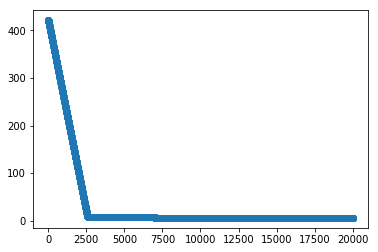

In [74]:
plt.scatter(list(range(len(losses))), losses)

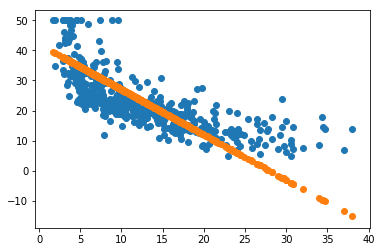

In [75]:
y_ = [price(k, b, x) for x in boston_x]
plt.scatter(boston_x, boston_y)
plt.scatter(boston_x, y_)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)